# Easy explain LRP for Yolov8 models: Use as a package

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import requests
from io import BytesIO
import torchvision
from ultralytics import YOLO
from PIL import Image
import sys
import os

# Set up paths
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from easy_explain.methods.lrp.yolov8.yolo import YOLOv8LRP

Let's load our model. We will use the yolov8s from ultralyticsplus

In [3]:
model = YOLO('ultralyticsplus/yolov8s')

Let's get our image. We will get an image from [Unsplash](https://unsplash.com)

In [4]:
response = requests.get("https://images.unsplash.com/photo-1584649525122-8d6895492a5d?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")
image = Image.open(BytesIO(response.content))

Basic transformations for the image

In [5]:
desired_size = (512, 640)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(desired_size),
    torchvision.transforms.ToTensor(),
])
image = transform(image)

### Explainable AI - LRP part 

Here, we load the lrp xai class for Yolov8 on cpu and pass inside the Yolov8 model. Afterwards we use it to explain the model outputs based on the class 'traffic light'.

In [6]:
lrp = YOLOv8LRP(model, power=2, eps=1, device='cpu')
explanation_lrp = lrp.explain(image, cls='traffic light', contrastive=False).cpu()

Now we have our explanations, so let's use the appropriate function to visualize them with various ways

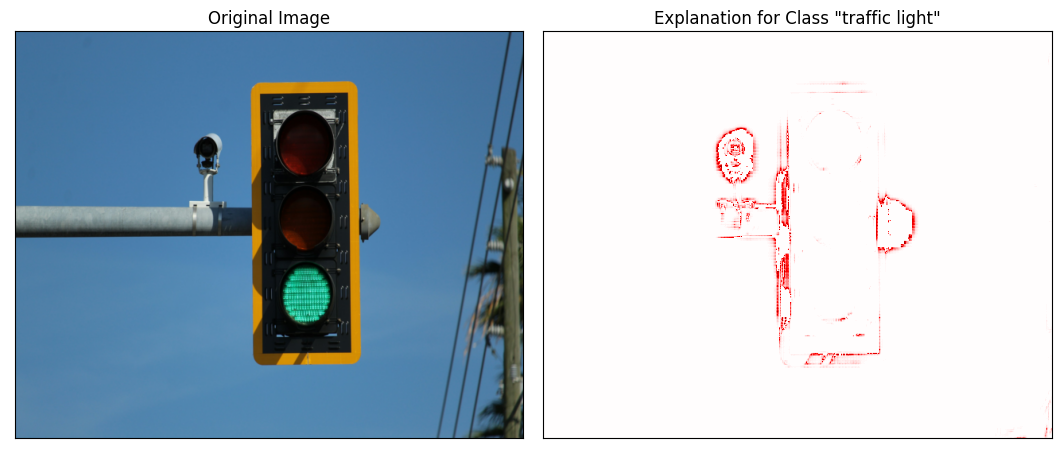

In [7]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=True, cmap='seismic', title='Explanation for Class "traffic light"')

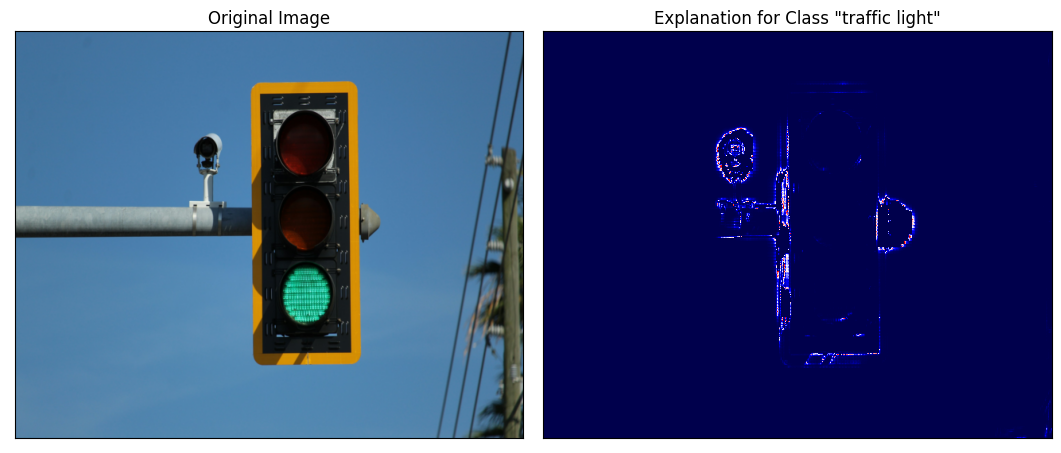

In [8]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=False, cmap='seismic', title='Explanation for Class "traffic light"')

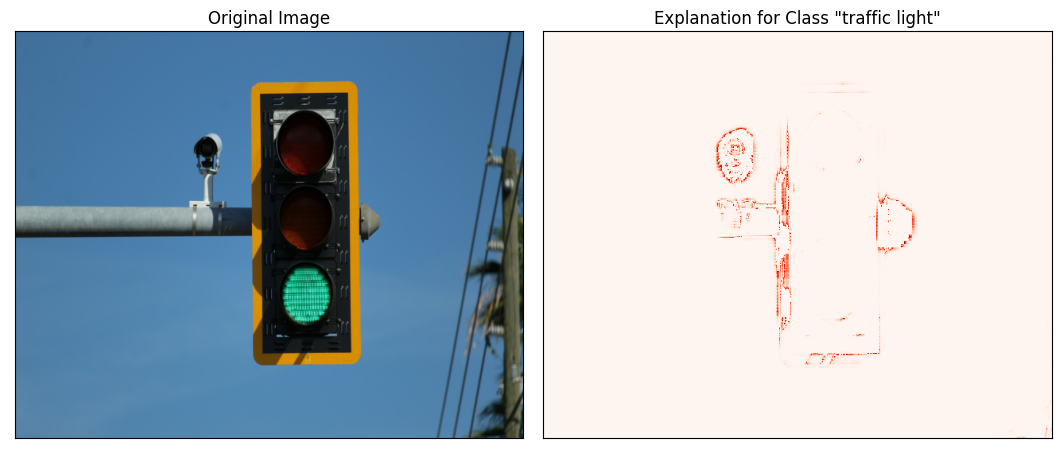

In [9]:
lrp.plot_explanation(frame=image, explanation = explanation_lrp, contrastive=False, cmap='Reds', title='Explanation for Class "traffic light"')